###Загрузите файл HR.csv в pandas dataframe

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#загружаю-смотрю данные
hr = pd.read_csv('HR.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
hr.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

###Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение)

In [ ]:
hr.describe()
#здесь есть среднее, медиана, мин/макс, ско - нет только моды

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
hr_mode = hr.mode()
hr_mean

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

###Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
hr.corr() #матрица корреляции

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


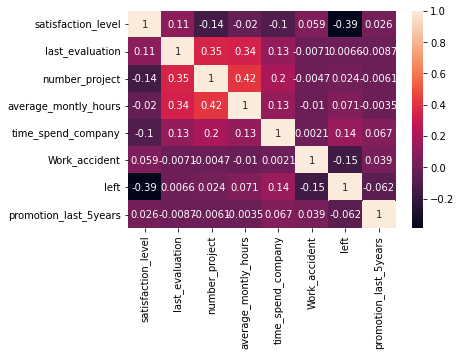

In [ ]:
sns.heatmap(hr.corr(), annot=True)

In [ ]:
correlation_map = hr.corr()

In [ ]:
min_x = correlation_map.abs().min().min() #нахожду минимальное значение корреляции по модулю
min_x

0.0021204180967097077

In [ ]:
min_result = np.where(correlation_map.abs().eq(min_x))[0] #ищу где лежит это значение - код нашла на стаковерфлоу
min_result

array([4, 5])

In [ ]:
min_first_param = correlation_map.index[min_result[0]] #определяю названия столбцов
min_second_param = correlation_map.index[min_result[1]] 
print(f'Наименее скорелированные параметры - {min_first_param} и {min_second_param}, их значение корелляции - {min_x}')

Наименее скорелированные параметры - time_spend_company и Work_accident, их значение корелляции - 0.0021204180967097077


In [ ]:
correlation_map_copy = correlation_map.copy()
for i in range (0, len(correlation_map_copy)):
  correlation_map_copy.iloc[[i], [i]] = np.nan #убираю единицы на пересечении тк они будут мешать искать максимум

In [ ]:
correlation_map_copy

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,NaN,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,NaN,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,NaN,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,NaN,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,NaN,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,NaN,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,NaN,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,NaN


In [ ]:
#повторяю все как с минимумом
max_x = correlation_map_copy.abs().max().max()
max_result = np.where(correlation_map_copy.abs().eq(max_x))[0] 
max_first_param = correlation_map_copy.index[max_result[0]] 
max_second_param = correlation_map_copy.index[max_result[1]] 
print(f'Наболее скорелированные параметры - {max_first_param} и {max_second_param}, их значение корелляции - {max_x}')

Наболее скорелированные параметры - number_project и average_montly_hours, их значение корелляции - 0.41721063440177986


###Рассчитайте сколько сотрудников работает в каждом департаменте

In [ ]:
hr.groupby('department')['department'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

###Показать распределение сотрудников по зарплатам.

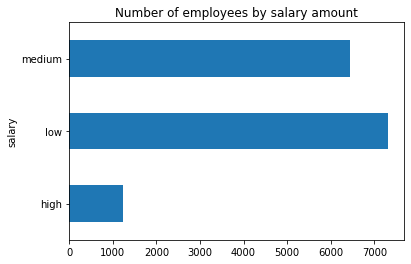

In [ ]:
hr.groupby('salary')['salary'].count().plot(kind='barh', title='Number of employees by salary amount', ylabel = 'Number of employees')

###Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [ ]:
hr_salary_stats = hr.groupby(['department', 'salary'])['number_project'].count()
hr_salary_stats

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: number_project, dtype: int64

In [ ]:
hr_salary_stats = pd.DataFrame(hr_salary_stats.reset_index())
hr_salary_stats.columns = ['department', 'salary', 'employees']

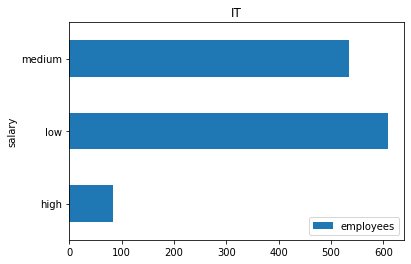

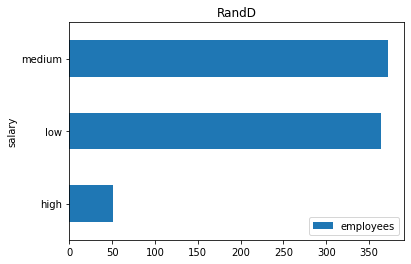

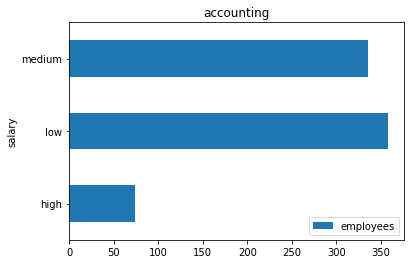

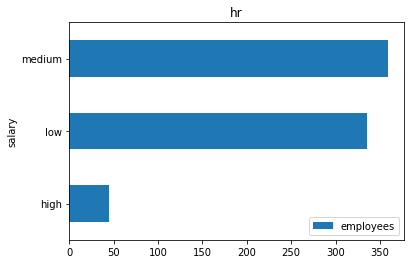

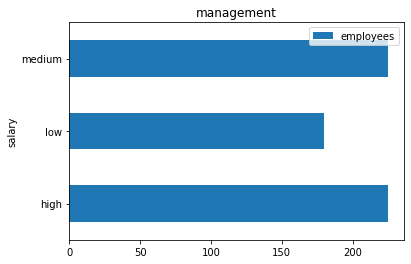

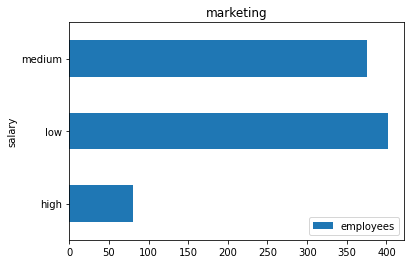

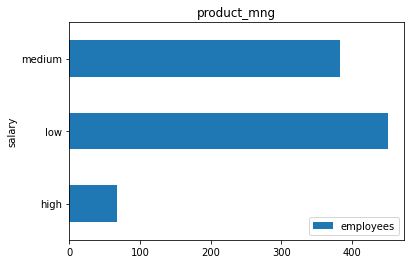

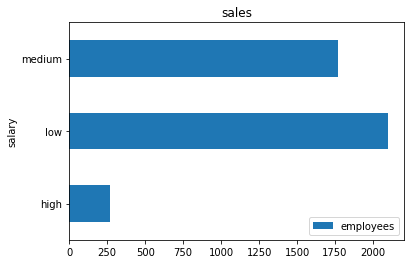

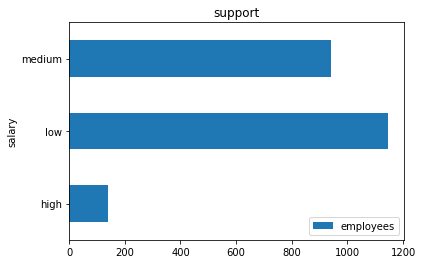

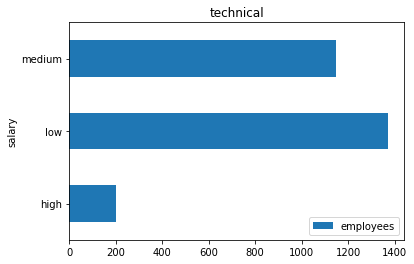

In [ ]:
for department in hr_salary_stats['department'].unique():
  hr_salary_stats[hr_salary_stats['department'] == department].plot(kind='barh', title=department , x = 'salary', y = 'employees', ylabel = 'Number of employees')

###Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким

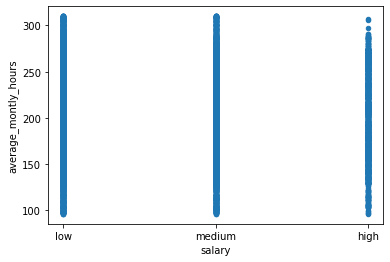

In [ ]:
hr.plot(kind='scatter', x = 'salary', y = 'average_montly_hours')
#визуально взаимосвязь не наблюдается

In [ ]:
hr.groupby('salary')['average_montly_hours'].agg(['mean', 'min', 'max', 'median'], )
#по основным характеристикам тоже - средние/медианные значения практически не различаются

,mean,min,max,median
salary,,,,
high,199.867421,96,307,199.0
low,200.996583,96,310,199.0
medium,201.338349,96,310,201.0


In [ ]:
hr_corr = hr.copy()
hr_corr['salary'] = hr_corr['salary'].replace(['low', 'medium', 'high'], [1, 2, 3])
hr_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [ ]:
hr_corr[['salary', 'average_montly_hours']].corr(method = 'spearman')

,salary,average_montly_hours
salary,1.000000,0.002452
average_montly_hours,0.002452,1.000000


In [ ]:
hr_corr[['salary', 'average_montly_hours']].corr(method = 'kendall')

,salary,average_montly_hours
salary,1.000000,0.001896
average_montly_hours,0.001896,1.000000


In [ ]:
#Вывод: имеющиеся данные не подтверждают гипотезу

###Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
Доля сотрудников с повышением за последние 5 лет  
Средняя степень удовлетворенности  
Среднее количество проектов

Доля сотрудников с повышением за последние 5 лет

In [ ]:
hr_stats = hr.groupby('left')['department', 'promotion_last_5years'].agg({'department': 'count', 'promotion_last_5years': 'sum'})
hr_stats.columns = ['employees_total', 'employees_got_promotion_last_5years']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,employees_total,employees_got_promotion_last_5years
left,,
0,11428,300
1,3571,19


In [ ]:
hr_stats['got_promotion_ratio'] = hr_stats.apply(lambda row: row['employees_got_promotion_last_5years'] / row['employees_total'], axis=1)
hr_stats

,employees_total,employees_got_promotion_last_5years,got_promotion_ratio
left,,,
0,11428,300,0.026251
1,3571,19,0.005321


Средняя степень удовлетворенности

In [ ]:
hr_stats_sl = hr.groupby('left')['satisfaction_level'].mean()
hr_stats_sl

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

Среднее количество проектов

In [ ]:
hr_stats_pr = hr.groupby('left')['number_project'].mean()
hr_stats_pr

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

###Построить модель LDA
Разделить данные на тестовую и обучающую выборки  
Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)  
 Оценить качество модели на тестовой выборке

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
hr_data = hr[['satisfaction_level',	'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident',	'left',	'promotion_last_5years']]
hr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [ ]:
x = hr_data[['satisfaction_level',	'last_evaluation',	'number_project',	'average_montly_hours',	'time_spend_company',	'Work_accident',	'promotion_last_5years']]
y = hr_data[['left']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)

In [ ]:
lda.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [ ]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
result = pd.DataFrame([y_test.values.ravel(), lda.predict(X_test)]).T
result

,0,1
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
4495,0,0
4496,0,0
4497,0,0
4498,1,1


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test.values.ravel(), lda.predict(X_test))

0.7564444444444445